In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
import warnings
from tqdm import tqdm
import time
import os

warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', None)
sns.set_palette('Spectral')
sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')

# Commits Status

- commit 1, date 15.11.23 "first commint"
- commit 2, date 15.11.23 "menambahkan latar belakang"
- commit 3, date 15.11.23 "coba untuk tambahkan feature harga beli mobil menggunakan dataset other. namun hasilnya belum memuaskan, masih terlalu banyak yang kosong"
- commit 4, date 16.11.23 "ganti datasets yang lebih relevan"
- commit 5, date 16.11.23 "adding function to set price drop and convert to km"
- commit 6, date 17.11.23 "Add interpretation to the shown correlation results and data taken only with secondhand status."

# Latar Belakang

Belakangan ini, kantor pemerintahan mengadakan anggaran untuk penyewaan kendaraan roda 4. Hal tersebut membuat pihak penyedia perlu untuk menhitung profitable dalam usaha ini. Mereka perlu mendapatkan gambaran harga jual mobil bekas ketika 5 tahun kemudian. Sebagai Data Saintis kita perlu membuat model prediksi yang akurat untuk membantu keputusan investasi kendaraan roda 4.

# ETL 

## E : Extracting Data

In [2]:
# read train and test data
df=pd.read_csv('./datasets/others data/car_data.csv', index_col='Unnamed: 0')

## T : Transforming Data

In [3]:
# transforming test cols name
new_cols=[]
for x in df.columns:
    name='_'.join(x.lower().split())
    new_cols.append(name)
    
df.columns=new_cols

In [4]:
# transforming dataset cars
df['price']=df.price.apply(lambda x: ''.join(x.split('$')[-1].split(',')))
df=df[df.price!='Not Priced']
df['price']=df.price.astype(float)
df['price']=df['price'] * 15000

In [5]:
# retext model without years in the sentence
df['model']=df['model'].apply(lambda x: ' '.join(x.split()[1:]))

In [6]:
# create brand from the first word in model feature
df['brand']=df.model.apply(lambda x: x.split()[0])

In [7]:
# create function to classification condition car by status
def get_condition_car(x):
    if x == 'New':
        msg = 'New'
    elif x == 'Used':
        msg = 'Secondhand'
    else:
        msg = 'Factory Re-Sell'
    return msg

# apply the function
df['condition']=df.status.apply(get_condition_car)
df=df[['brand','model','year','status','condition','mileage','price','msrp']]

In [8]:
# create function to set price drop by msrp
def get_price_drop(x):
    if x == 'Not specified':
        hasil = 0
    else:
        hasil = ''.join(filter(str.isdigit, x))
    return hasil

df['price drop'] = df['msrp'].apply(get_price_drop)
df['price drop'] = df['price drop'].astype(float)
df['price drop']=df['price drop'] * 15000

In [9]:
# create function to convert milleage to km
def get_km(x):
    if x == 'Not available':
        hasil = 0
    else:
        hasil = ''.join(filter(str.isdigit, x))
    return hasil

df['in km'] = df['mileage'].apply(get_km)
df['in km'] = df['in km'].astype(float)

# convert mil to km
km = 1.6
df['in km'] = df['in km'] * km

In [10]:
# get the data is not a new car
df=df[df.condition=='Secondhand']
df.reset_index(drop=True, inplace=True)

# geting price second and percentase of price drop
df['price second']=df.price - df['price drop']
df['percent drop']=np.round((df['price drop']/df['price'])*100, 2)
df=df[['brand','model','year','condition','in km','price','percent drop','price drop','price second']]
df=df[df['price drop']>0]

## L : Loading Data

# Exploratory Data Analyst

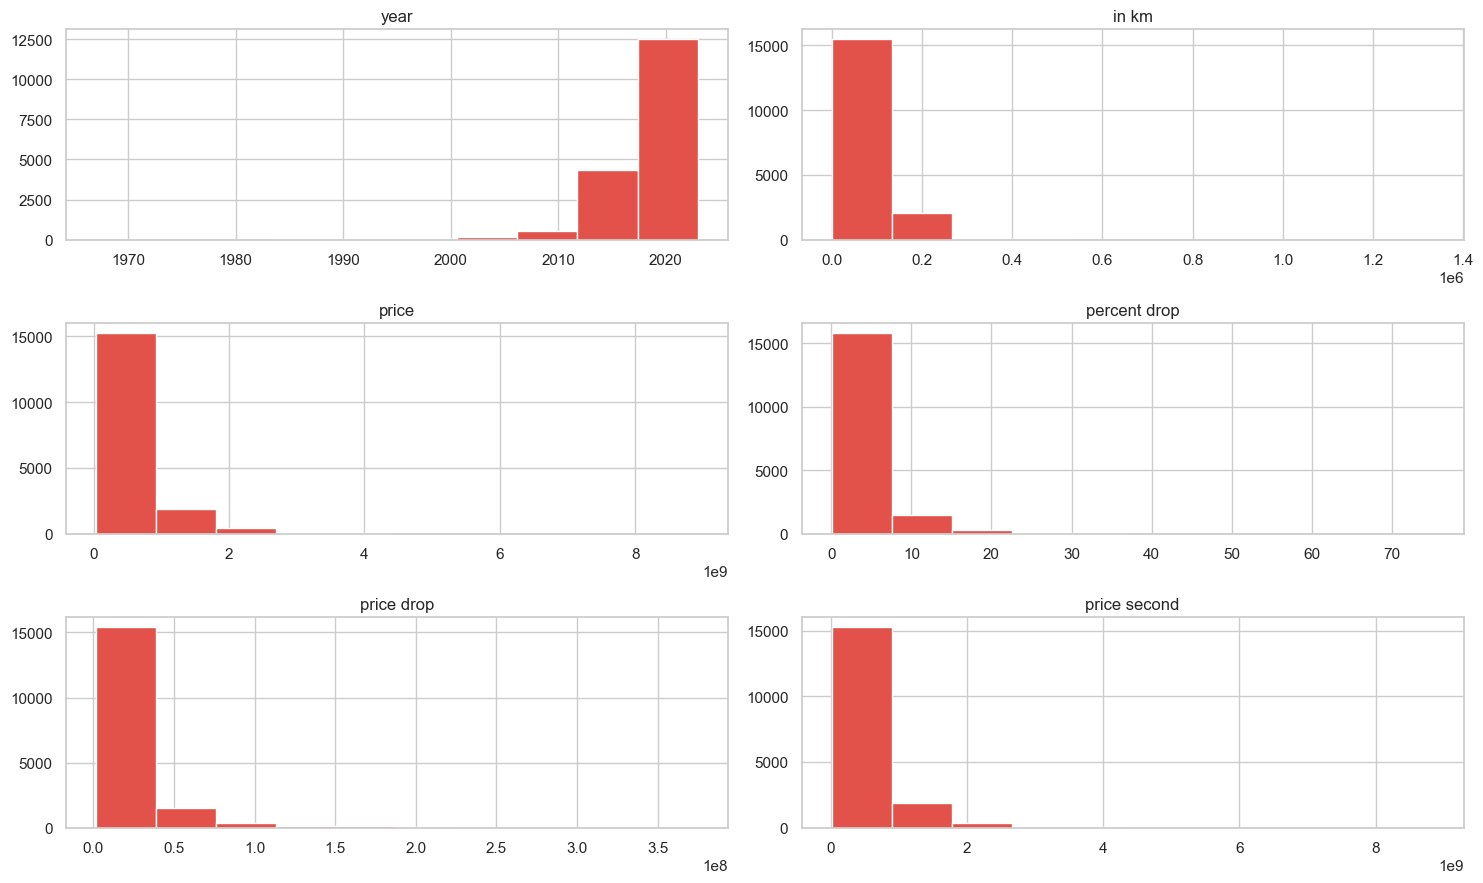

In [11]:
df.hist(figsize=(15,9))
plt.tight_layout()
plt.show()

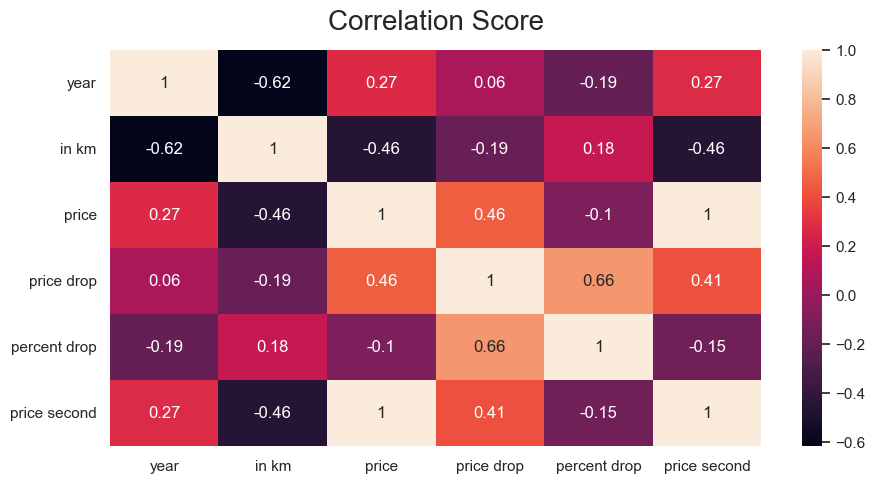

In [17]:
corr=df[['year','in km','price','price drop','percent drop','price second']].corr()

plt.figure(figsize=(9.5,5))
plt.title('Correlation Score', fontsize=20, pad=15)
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Positive Correlation**

1. **(Price Second)** and **(Price Drop)** have a correlation value of **0.41**. This condition suggests that the more expensive the initial Price of the purchased car **(Price)**, the larger the drop in **(Price Drop)** when resold. This is supported by observing the correlation score between **(Price)** and **(Price Drop)** which is **0.46**.
2. **(Price Second)** and **(Price)** have a correlation value of **1**. From this information, it suggests that the avg of percentage decrease in price is very low, resulting in a correlation value between **(Price Second)** and **(Price)** equal to **1**.
3. **(Price Second)** and **(Year)** have a correlation value of **0.27**. The correlation value is low, but it suggests that when the car is from a newer era, the secondary price tends to be higher compared to cars from an older era.
    
    
**Negative Correlation**

1. **(Price Second)** and **(in Km)** have a correlation value of **0.46**. From the inverse correlation score, it provides information that the farther the mileage of the car, the lower the resale price of the car.